# Historical Data

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas_datareader.data as web
import ffn
import plotly.express as px
import yfinance as yf


In [ ]:
Microsoft = yf.Ticker("MSFT").history(period='5y')
Apple= yf.Ticker("AAPL").history(period='5y')
JPMorgan= yf.Ticker("JPM").history(period='5y')

### 1. Fetching Historical Data

In [2]:
import yfinance as yf

data = yf.download("AAPL", start="2024-01-01", end="2024-01-20")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.639999   
2024-01-03  184.220001  185.880005  183.429993  184.250000  184.250000   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.910004   
2024-01-05  181.990005  182.759995  180.169998  181.179993  181.179993   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.559998   

              Volume  
Date                  
2024-01-02  82488700  
2024-01-03  58414500  
2024-01-04  71983600  
2024-01-05  62303300  
2024-01-08  59144500  


### 2. Ticker Object

The Ticker class allows you to access various data for a specific stock.

In [3]:
apple = yf.Ticker("AAPL")
print(apple.info)  # General information about Apple Inc.

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In add

### 3. Getting Recent Data
Want data for the most recent trading days? Here’s how:

In [4]:
recent_data = yf.download("AAPL", period="5d")
print(recent_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   
2024-01-23  195.020004  195.750000  193.830002  195.179993  195.179993   
2024-01-24  195.419998  196.380005  194.339996  194.500000  194.500000   

              Volume  
Date                  
2024-01-18  78005800  
2024-01-19  68741000  
2024-01-22  60133900  
2024-01-23  42355600  
2024-01-24  53578100  


### 4. Fetching Data for Multiple Tickers
Retrieve data for multiple stocks in one go.



In [5]:
multi_data = yf.download(["AAPL", "MSFT"], start="2020-01-01", end="2021-01-01")
print(multi_data)

[*********************100%%**********************]  2 of 2 completed

             Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2020-01-02   73.152649  154.779556   75.087502  160.619995   75.150002   
2020-01-03   72.441452  152.852249   74.357498  158.619995   75.144997   
2020-01-06   73.018684  153.247345   74.949997  159.029999   74.989998   
2020-01-07   72.675278  151.850067   74.597504  157.580002   75.224998   
2020-01-08   73.844360  154.268814   75.797501  160.089996   76.110001   
...                ...         ...         ...         ...         ...   
2020-12-24  129.679749  216.924271  131.970001  222.750000  133.460007   
2020-12-28  134.317825  219.076492  136.690002  224.960007  137.339996   
2020-12-29  132.529388  218.287659  134.869995  224.149994  138.789993   
2020-12-30  131.399368  215.882248  133.720001  221.679993  135.990005   
2020-12-31  130.387238  216.602921  13

### 5. Adjusted Data Retrieval
Obtain adjusted data, which accounts for stock splits, dividends, etc.

In [1]:
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01", auto_adjust=True)
data['Close'] = data['Close']  # Creating a new column with the same values as the existing 'Close' column

print(data['Close'])


[*********************100%%**********************]  1 of 1 completed

Date
2020-01-02     73.152664
2020-01-03     72.441460
2020-01-06     73.018684
2020-01-07     72.675285
2020-01-08     73.844353
                 ...    
2020-12-24    129.679733
2020-12-28    134.317841
2020-12-29    132.529388
2020-12-30    131.399384
2020-12-31    130.387238
Name: Close, Length: 253, dtype: float64


### 6. Interval-based Data Retrieval
Retrieve data based on specific intervals, like daily or weekly.

In [ ]:
weekly_data = yf.download("AAPL", start="2020-01-01", end="2021-01-01", interval="1wk")
print(weekly_data)

### 7. Retrieving Dividends and Splits
Access dividend and stock split history.

In [7]:
apple = yf.Ticker("AAPL")
dividends = apple.dividends
splits = apple.splits
print(dividends, splits)


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
Name: Dividends, Length: 81, dtype: float64 Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


### 8. Real-time Data
Fetch the most up-to-date stock price.



In [8]:
apple = yf.Ticker("AAPL")
print(apple.history(period="1d"))

                                 Open        High         Low  Close  \
Date                                                                   
2024-01-24 00:00:00-05:00  195.419998  196.380005  194.339996  194.5   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-01-24 00:00:00-05:00  53578100        0.0           0.0  


### 9. Data for Specific Dates
Obtain data for a specific date range

In [9]:
data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669983   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943954   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056946   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.127060   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.307236   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.339417   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.889557   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.207794   

               Volume  
Date         

### 10. Visualization with yfinance
Visualize historical data with ease.

[*********************100%%**********************]  1 of 1 completed


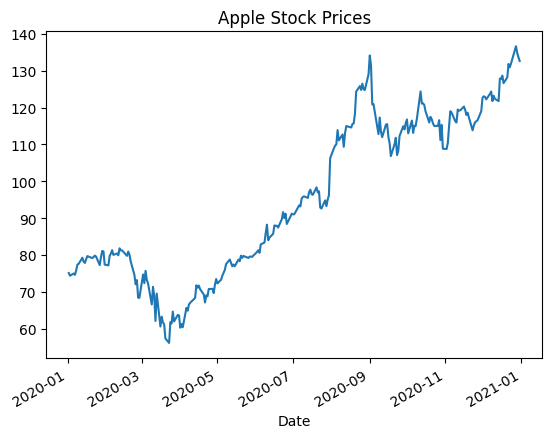

In [10]:
import matplotlib.pyplot as plt

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
data['Close'].plot()
plt.title("Apple Stock Prices")
plt.show()

In [11]:
### Data for multiple tickers

# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%%**********************]  6 of 6 completed

                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2015-01-02  24.466448  81.022285  113.657219  104.297112  34.161900  71.167397
2015-01-05  23.777187  78.879578  112.870056  102.655998  33.208313  70.960304
2015-01-06  23.779428  77.198494  111.540634  100.442101  32.313717  71.507095
2015-01-07  24.112867  78.884529  113.272385   99.785652  31.556747  73.404343
2015-01-08  25.039341  80.002716  115.275276  101.954498  33.100174  74.953598
